In [2]:
#when this line is used, no need for plt.show(). Automatically plot happens
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None) #use delim_whitespace because this file is not CSV
col_study=['ZN', 'INDUS', 'NOX', 'RM'] #only these columns are of interest
col_name=['CRIM',
'ZN',
'INDUS',
'CHAS',
'NOX',
'RM',
'AGE',
'DIS',
'RAD',
'TAX',
'PTRATIO',
'B',
'LSTAT',
'MEDV']
df.columns = col_name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis (EDA)

In [4]:
df.describe() # description of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX       full-value property-tax rate per $10,000$
    11. PTRATIO   pupil-teacher ratio by town
    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT     % lower status of the population
    14. MEDV      Median value of owner-occupied homes in $1000's

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

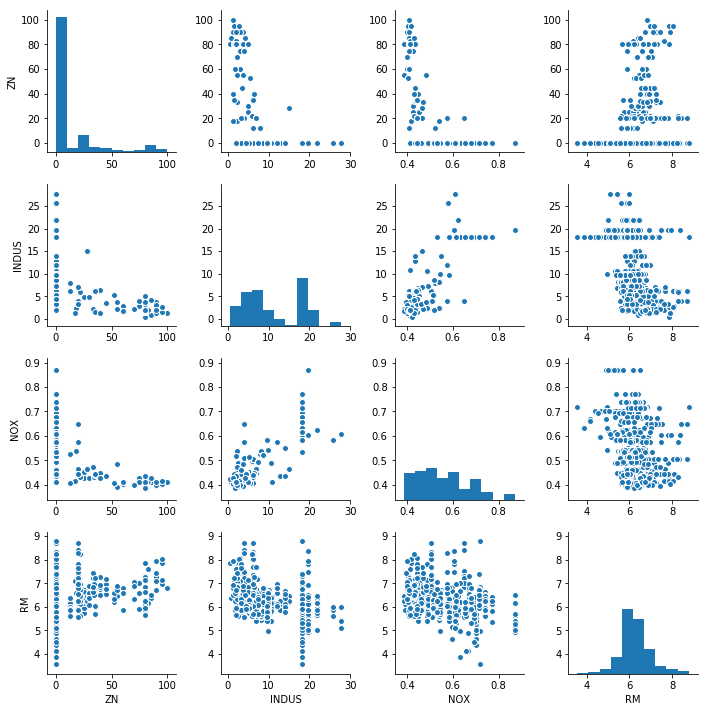

In [8]:
sns.pairplot(df[col_study], size=2.5) #pairplot from seaborn. This is very helpful for correlation
plt.show()

# Correlation Analysis and Feature Selection

In [6]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
pd.options.display.float_format='{:,.3f}'.format #this command helps to restrict to 3 decimals for values
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


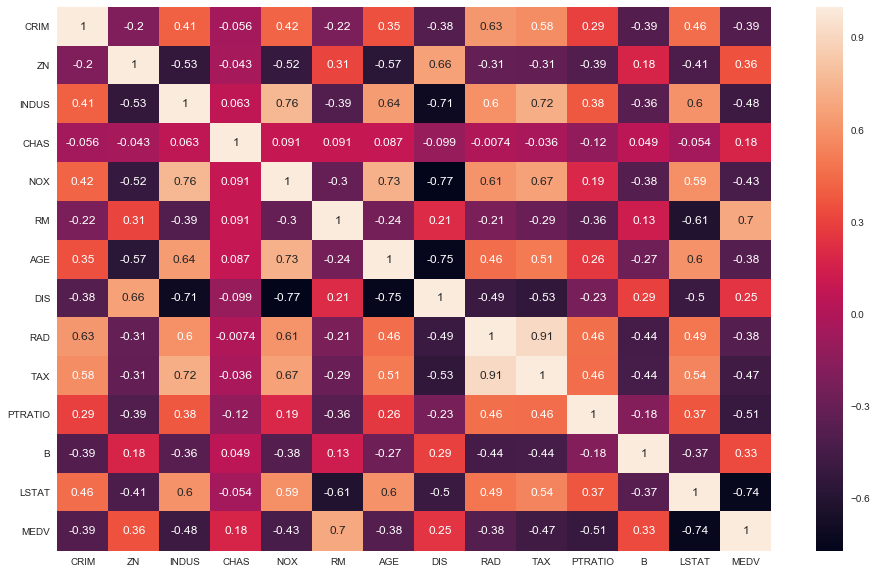

In [37]:
col_study=['CRIM','ZN','INDUS','CHAS', "MEDV"]
col_name=['CRIM',
'ZN',
'INDUS',
'CHAS',
'NOX',
'RM',
'AGE',
'DIS',
'RAD',
'TAX',
'PTRATIO',
'B',
'LSTAT',
'MEDV']
plt.figure(figsize=(16,10))
sns.heatmap(df[col_name].corr(),annot=True) #heatmap shows where the correlation is highest. Extremly dark is lowest 
plt.show() #annot=True puts the value inside the box of the heatmap

### There is a high correlation between RM (Rooms) and MEDV (Median Value). Also between TAX and RAD (Access to highway). Also high correlation between AGE and LSTAT (% of Lower Status) 

# A sample Linear Regression plot between Median house value vs Number of rooms. This example uses regplot and jointplot

In [9]:
df.head() # dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
# step 3 - arrange data to feature matrix and target array
X = df[['RM']].values
y = df['MEDV'].values #y-axis

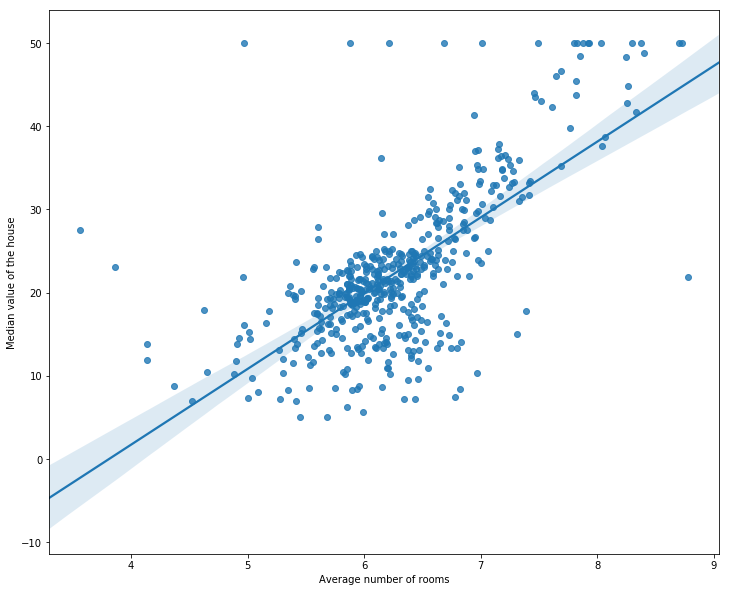

0.0


Signature: plt.plot(*args, **kwargs)
Docstring:
Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

If used with labeled data, make sure that the color spec is not
included as an element in data, as otherwise the last case
``plot("v","r", data={"v":..., "r":...)``
can be interpreted as the first case which would do ``plot(v, r)``
using the default line style and color.

If not used with labeled data (i.e., without a data argument),
an arbitrary number of *x*, *y*, *fmt* groups can be specifie

In [35]:
from sklearn.linear_model import LinearRegression # step 1 - choose a model
Model = LinearRegression() # step 2 - instantiate the model and choose hyperparameters
Model.fit(X,y) # step 4 - fit the model to data
plt.figure(figsize=(12,10)) #adjust the figure size
sns.regplot(X,y) #use regression plot
plt.xlabel('Average number of rooms') #x-axis label
plt.ylabel('Median value of the house') #y-axis label
plt.show()
print(Model.intercept_)

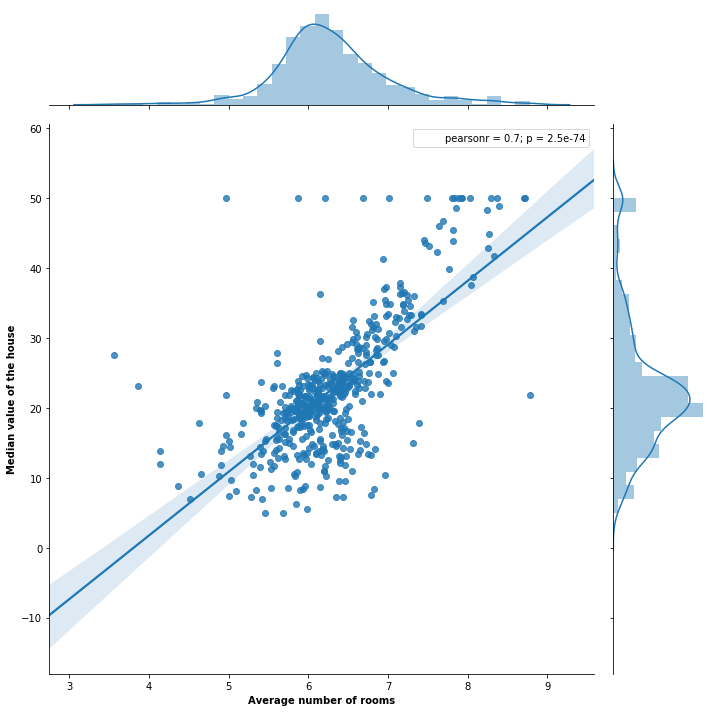

In [12]:
h=sns.jointplot(x="RM", y="MEDV", data=df, kind='reg', size=10)
h.ax_joint.set_xlabel('Average number of rooms', fontweight='bold')
h.ax_joint.set_ylabel('Median value of the house', fontweight='bold')
plt.show()

$\textbf {There is a negative correlation between LSTAT and MEDV. Also it is not a linear relationship}$

In [13]:
X = df['LSTAT'].values.reshape(-1,1) #reshape the number of rooms. Any x-axis has to be reshaped to matrix
y = df['MEDV'].values #y-axis

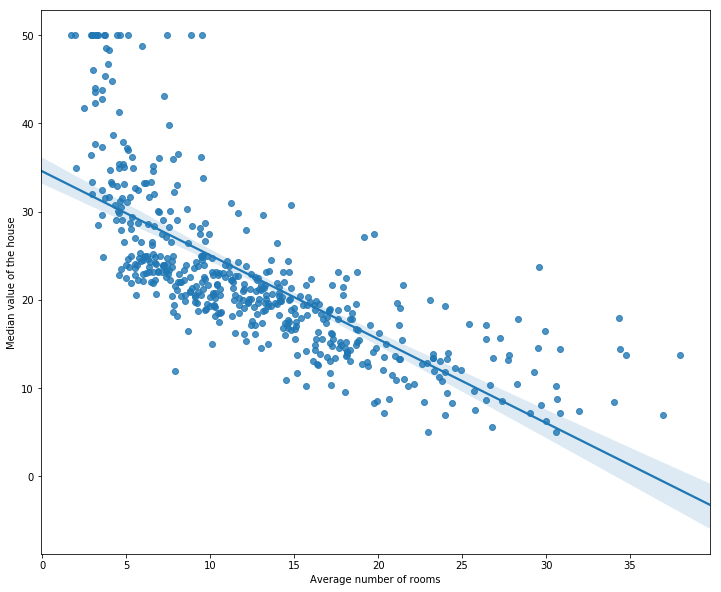

In [14]:
Model = LinearRegression() 
Model.fit(X,y) 
plt.figure(figsize=(12,10)) 
sns.regplot(X,y) 
plt.xlabel('Average number of rooms') 
plt.ylabel('Median value of the house')
plt.show()

# Use the link below to test linear regression and its drawbacks
url = http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html

# A sample RAndom SAmple Consensus (RANSAC) algorithm plot between Median house value vs Number of rooms. This example helps identify the outliers and makes use of scatter plot

### RANSAC algorithm continually iterates using random samples from the original data and classifies data as inliers or ouliers based on a threshold. All inliers are then aggregated to form the data subset

In [15]:
from sklearn.linear_model import RANSACRegressor

In [61]:
X = df['RM'].values.reshape(-1,1) #reshape the number of rooms. Any x-axis has to be reshaped to matrix
y = df['MEDV'].values #y-axis
ransac = RANSACRegressor() # choose the model and instantiate the class
ransac.fit(X,y) #fit the model to the data
inlier_mask = ransac.inlier_mask_ #choose the inliers
outlier_mask = np.logical_not(inlier_mask) #use numpy's logical_not method to choose outliers
line_X = np.arange(3,10,1) #Generate an array of values between 3 and 10 (excluding 10) in increments of 1
line_y_ransac = ransac.predict(line_X.reshape(-1,1)); #predict external variable line_y_ransac based on observed dataset

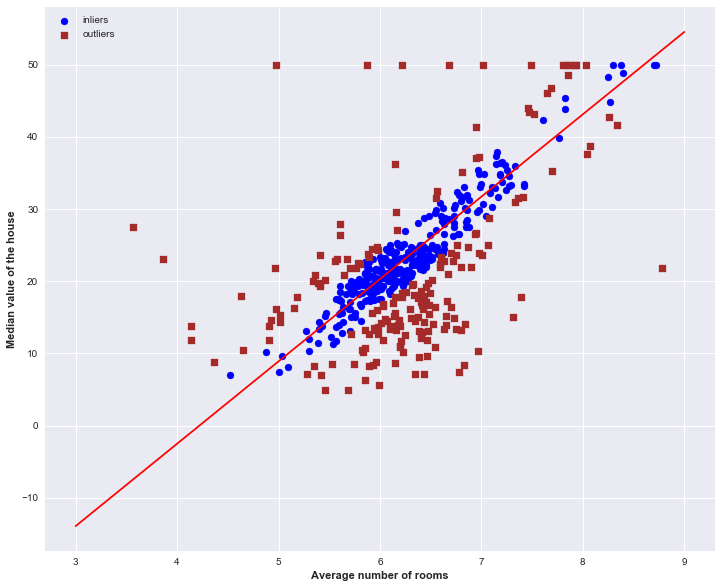

In [62]:
sns.set(style='darkgrid', context='notebook') #set the style
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask],y[inlier_mask],c='blue',marker='o',label='inliers') #inliers
plt.scatter(X[outlier_mask],y[outlier_mask],c='brown',marker='s',label='outliers') #outliers
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms', fontweight='bold')
plt.ylabel('Median value of the house', fontweight='bold')
plt.legend(loc='upper left')
plt.show()

## Performance Evaluation of Regression Model

In [18]:
from sklearn.model_selection import train_test_split #scikit learn has packages to split train and test data

In [19]:
X = df['RM'].values.reshape(-1,1)
#X1 = df.iloc[:,:-1].values  #iloc is for integer based location selection. iloc[row selection, column selection]. 
# in the above it means select all rows and select all columns except last column. Use this for example to 
# select all columns except MEDV and run a regression  
y = df['MEDV'].values

In [20]:
#split the train and test data for X and y. Use 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
lr = LinearRegression() # pick linear regression model
lr.fit(X_train, y_train) # fit model to data
y_train_pred = lr.predict(X_train) # predict new train dataset based on trained data
y_test_pred = lr.predict(X_test) # predict new test dataset based on test data

## Method 1 - Residual Analysis

(-10, 50)

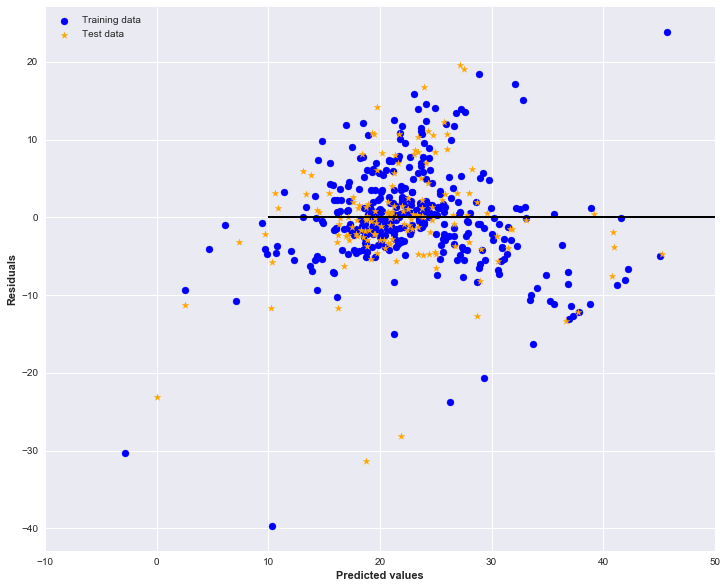

In [22]:
plt.figure(figsize=(12,10))
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue',marker='o',label='Training data') #y_train_pred-y_train = Error
plt.scatter(y_test_pred,y_test_pred-y_test,c='orange',marker='*',label='Test data') 
plt.xlabel('Predicted values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=10, xmax=50, lw=2, color='k') # horizontal line starting from x=10 to 50
plt.xlim([-10,50]) #x-axis from -10 to 50

# Method 2 - Mean Squared Error (MSE)
#### MSE = $$\frac{1}{n}\sum_{i=0}^n (y_i-\bar{y_i})^2$$
###### 1. Average value of the sums of Squared Error cost function
###### 2. Useful for comparing different regression models
###### 3. For tuning parameters via a grid search and cross-validation

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y_train,y_train_pred) #find the error between actual-expected

42.157650863122242

In [25]:
mean_squared_error(y_test,y_test_pred)

47.033047479755183

## Method 3 - Coefficient of Determination, $R^2$  
$$R^2 = 1-\frac{SSE}{SST}$$
#### SSE = Sum of Squared Errors
#### SST = Total Sum of Squares
##### $R^2$ provides a measure of how well future samples are likely to be predicted by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.0
###### For more on $R^2$, read this - http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_train, y_train_pred)

0.50264976300408271

In [28]:
r2_score(y_test, y_test_pred)

0.43514364832115193

# Compare a near perfect model - Use Residual Analysis, MSE and Coefficient of Determination to see how they look for a near perfect model

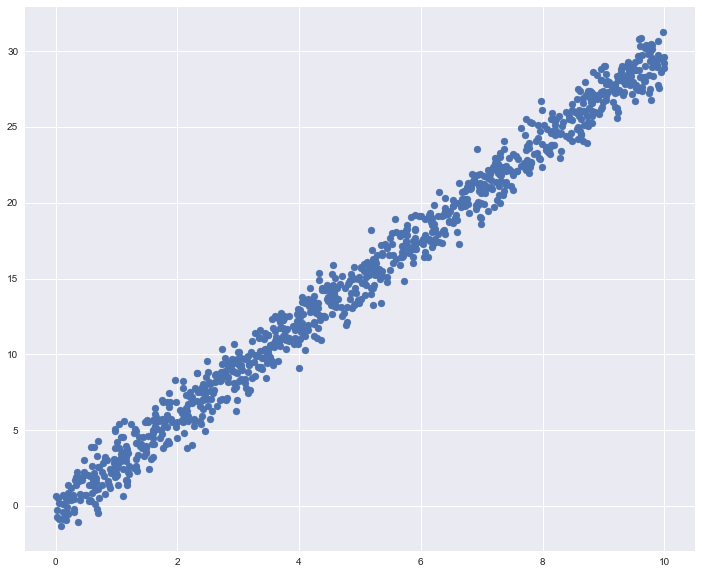

In [29]:
#RandomState exposes a number of methods for generating random numbers drawn from a variety of probability 
#distributions. In addition to the distribution-specific arguments, each method takes a keyword argument size 
#that defaults to None. If size is None, then a single value is generated and returned. If size is an integer, 
#then a 1-D array filled with generated values is returned. If size is a tuple, then an array with that shape 
#is filled and returned

generate_random = np.random.RandomState(0) #generate 1000 random numbers
x = 10 * generate_random.rand(1000) #Here x is the input.Use 10 to maginify the random number. Otherwise it will be small
y = 3 * x + np.random.randn(1000) #Here y is the target array.randn is normally distributed. y is dependent on x
plt.figure(figsize=(12,10))
plt.scatter(x,y)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split #scikit package to split train and test data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #split train and test data

In [32]:
from sklearn.linear_model import LinearRegression # step 1 - choose a model
Model = LinearRegression(fit_intercept=True) # step 2 - instantiate the model and choose hyperparameters
Model.fit(X_train.reshape(-1,1),y_train) # step 4 - fit the model to data

y_train_pred = Model.predict(X_train.reshape(-1,1)) #step 5 - predict y_train_pred from X_train 
y_test_pred = Model.predict(X_test.reshape(-1,1))

## Method 1 - Residual Analysis

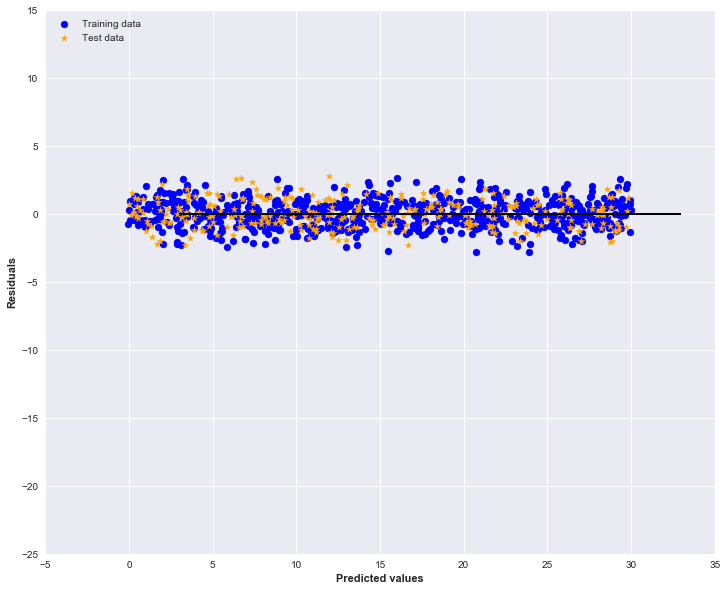

In [33]:
plt.figure(figsize=(12,10)) #adjust the figure size
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue',marker='o',label='Training data') #y_train_pred-y_train = Error
plt.scatter(y_test_pred,y_test_pred-y_test,c='orange',marker='*',label='Test data') 
plt.xlabel('Predicted values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=3, xmax=33, lw=2, color='k') # horizontal line starting from x=10 to 50
plt.xlim([-5,35]) #x-axis from -5 to 35
plt.ylim([-25,15])
plt.show()

## Method 2 - Mean Squared Error

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_pred)
mean_squared_error(y_test,y_test_pred)

1.0129512602165216

## Method 3 - Coefficient of Determination

In [35]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)
r2_score(y_test, y_test_pred)

0.98721814707190492